# **Projeto de Aprendizagem de Máquina** 






Descrição detalhada da divisão do projeto: 

- Etapas:
 - Carregar o dataset e importar as bibliotecas
 - Pequena Análise Exploratória
 - Pré-processamento com OSS, ENN e PCA
 - Seleção de Parâmetros / GridSearch 
 - Aplicação dos algoritmos
    - kNN
    - SVM
    - Naive-Bayes
    - Árvore de Decisão
    - MLP
  - Comparação de Matriz de Confusão e Relatório de Métricas


# 1 - Leitura dos Dados

**Importando as bibliotecas básicas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://www.openml.org/data/get_csv/584085/BNG_autos_5000_1.arff')

In [4]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,94.235189,volkswagen,diesel,turbo,four,hatchback,fwd,front,96.575655,173.369361,...,2bbl,3.122279,3.295534,9.219909,57.578864,5988.161816,31.814042,34.505390,8605.484961,2
1,106.648646,volvo,diesel,turbo,four,sedan,rwd,front,109.846269,196.214268,...,mfi,3.293933,3.392775,8.637036,113.705719,4490.621234,25.817650,35.053335,26633.568618,-1
2,118.472162,nissan,gas,std,four,wagon,fwd,front,95.024314,165.909864,...,mpfi,3.051725,3.248152,9.000000,117.757103,4799.168653,22.783708,27.760480,5900.715970,0
3,62.717600,porsche,gas,std,two,hatchback,rwd,front,100.174878,182.499698,...,1bbl,3.238181,3.241202,9.278929,85.762326,5086.244824,14.949801,24.464281,8641.179741,1
4,105.808352,honda,gas,std,four,sedan,fwd,front,96.792849,172.594242,...,2bbl,3.296874,3.506498,7.068202,73.158430,4417.985102,20.781260,19.686021,9831.490432,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   normalized-losses  1000000 non-null  float64
 1   make               1000000 non-null  object 
 2   fuel-type          1000000 non-null  object 
 3   aspiration         1000000 non-null  object 
 4   num-of-doors       1000000 non-null  object 
 5   body-style         1000000 non-null  object 
 6   drive-wheels       1000000 non-null  object 
 7   engine-location    1000000 non-null  object 
 8   wheel-base         1000000 non-null  float64
 9   length             1000000 non-null  float64
 10  width              1000000 non-null  float64
 11  height             1000000 non-null  float64
 12  curb-weight        1000000 non-null  float64
 13  engine-type        1000000 non-null  object 
 14  num-of-cylinders   1000000 non-null  object 
 15  engine-size        1000000 non-nu

In [6]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,113.510711,98.854919,175.094839,65.943307,53.776607,2560.843432,123.880027,3.326901,3.244812,9.983965,104.269063,5131.603023,24.451775,29.973515,13593.755393,0.821153
std,35.106574,5.990935,11.927550,2.121701,2.447637,504.357478,39.695208,0.266986,0.322483,3.845532,38.666009,547.573360,6.315004,6.416974,7970.598703,1.264560
min,37.625922,83.295423,134.019251,60.270307,46.979469,1512.825242,9.891578,2.558468,1.713911,-11.806341,38.144847,3406.968387,10.511926,11.470231,-11740.505210,-3.000000
25%,87.415814,95.016712,168.147694,64.366474,52.045923,2195.725215,98.587671,3.124133,3.115118,8.507955,75.024920,4793.758844,19.458207,25.363765,8046.079569,0.000000
50%,101.422245,97.061769,173.808763,65.624562,53.901260,2448.739895,112.789370,3.327894,3.278506,9.000000,95.446948,5092.150170,23.975710,29.876137,10823.699995,1.000000
75%,137.589230,101.587399,182.658106,66.871121,55.374157,2884.920428,134.757312,3.547367,3.416920,9.350466,118.154583,5486.313227,28.069830,33.407297,15824.226678,2.000000
max,273.722584,127.194382,215.994000,75.596629,62.500610,4716.212861,381.012483,4.072103,4.458423,42.161764,303.922617,6931.555398,54.824617,61.696829,63918.819174,3.000000


In [7]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,88888,865828,742443,522406,419455,471264,919619,462284,507365,361956


In [8]:
# list the data types for each column
print(df.dtypes)

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
symboling              int64
dtype: object


In [9]:
df.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

In [10]:
# Convertendo variável 'symboling' para formato categórico

df['symboling'] = df['symboling'].astype('category')
# df.drop(labels=['symboling'],axis=1,inplace=True)

In [11]:
# sns.countplot(x='symboling',data=df)

In [12]:
len(df.duplicated() == False)

1000000

In [13]:
df.drop(df.loc[df['price'] <= 0].index, inplace=True)

In [14]:
df.drop(df.loc[df['compression-ratio'] <= 0].index, inplace=True)

In [15]:
df.select_dtypes(include='float').columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [16]:
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

### Removendo *Outliers* via Método de Tukey

<AxesSubplot:xlabel='price'>

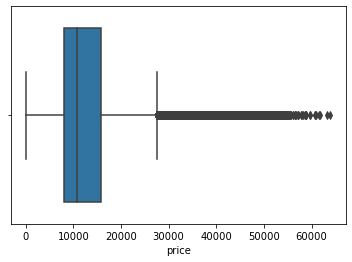

In [17]:
# quartis de preço (imteressante pra remover outliers)
sns.boxplot(df['price'])

In [18]:
# MAD calculado de forma manual
mad = abs(df['price'] - df['price'].median()).median()*(1/0.6745)

In [19]:
# Cálculo dos intervalos e valor do IQR

q1 = df['price'].quantile(q=0.25)
q3 = df['price'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

7778.0595925


In [20]:
# Salvando valores sem outliers em novo dataset

df = df[(df['price'] > (q1-1.5*iqr)) & (df['price'] < (q3+1.5*iqr))]
len(df)

909521

<AxesSubplot:xlabel='price'>

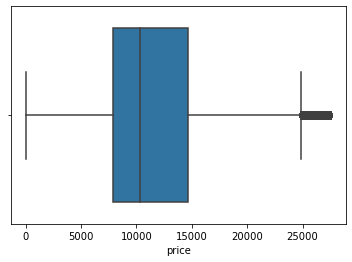

In [21]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

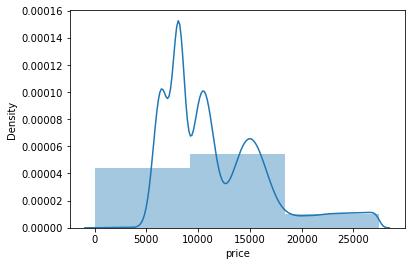

In [22]:
sns.distplot(a=df['price'],bins=3)

In [23]:
df['price'].count()

909521

In [24]:
df[df['price'] < 5000].count()

normalized-losses    3560
make                 3560
fuel-type            3560
aspiration           3560
num-of-doors         3560
body-style           3560
drive-wheels         3560
engine-location      3560
wheel-base           3560
length               3560
width                3560
height               3560
curb-weight          3560
engine-type          3560
num-of-cylinders     3560
engine-size          3560
fuel-system          3560
bore                 3560
stroke               3560
compression-ratio    3560
horsepower           3560
peak-rpm             3560
city-mpg             3560
highway-mpg          3560
price                3560
symboling            3560
dtype: int64

In [25]:
# Discretizando coluna de preços para o chi-quadrado
df['price_cat'] = pd.cut(df['price'],[0,10000,20000,30000])

In [26]:
df.select_dtypes(include='category').columns

Index(['symboling', 'price_cat'], dtype='object')

Processo de One-Hot Encoding das Variáveis Categóricas

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
dados = df.select_dtypes(include=['object','category']).astype('category')
dados.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,price_cat
0,volkswagen,diesel,turbo,four,hatchback,fwd,front,ohc,four,2bbl,2,"(0, 10000]"
1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,four,mfi,-1,"(20000, 30000]"
2,nissan,gas,std,four,wagon,fwd,front,ohc,four,mpfi,0,"(0, 10000]"
3,porsche,gas,std,two,hatchback,rwd,front,ohcv,eight,1bbl,1,"(0, 10000]"
4,honda,gas,std,four,sedan,fwd,front,ohc,six,2bbl,0,"(0, 10000]"


In [29]:
dados2 = df.select_dtypes(include=['float','int'])
dados2 = dados2.drop('price', axis=1)
dados2.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,94.235189,96.575655,173.369361,65.329051,54.678538,2193.379366,89.249734,3.122279,3.295534,9.219909,57.578864,5988.161816,31.814042,34.505390
1,106.648646,109.846269,196.214268,68.502701,54.348620,3211.189054,111.024531,3.293933,3.392775,8.637036,113.705719,4490.621234,25.817650,35.053335
2,118.472162,95.024314,165.909864,64.804938,52.702199,2098.071603,96.317551,3.051725,3.248152,9.000000,117.757103,4799.168653,22.783708,27.760480
3,62.717600,100.174878,182.499698,68.385729,50.742249,1879.045004,144.228109,3.238181,3.241202,9.278929,85.762326,5086.244824,14.949801,24.464281
4,105.808352,96.792849,172.594242,64.200921,55.741238,2353.389802,95.829115,3.296874,3.506498,7.068202,73.158430,4417.985102,20.781260,19.686021


In [30]:
# saving old dataset
old_df = df.copy()

# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
dados = encoder.fit_transform(dados)
print(dados)

[[20.  0.  1. ...  1.  5.  0.]
 [21.  0.  1. ...  4.  2.  2.]
 [12.  1.  0. ...  5.  3.  0.]
 ...
 [ 0.  1.  0. ...  5.  4.  1.]
 [ 7.  1.  1. ...  5.  2.  0.]
 [ 8.  0.  0. ...  3.  3.  1.]]


In [31]:
# selecionando o nome das colunas
col_dados = df.select_dtypes(include=['object','category']).astype('category').columns

In [32]:
dados = pd.DataFrame(dados, columns=col_dados)
dados.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,price_cat
0,20.0,0.0,1.0,0.0,2.0,1.0,0.0,3.0,2.0,1.0,5.0,0.0
1,21.0,0.0,1.0,0.0,3.0,2.0,0.0,3.0,2.0,4.0,2.0,2.0
2,12.0,1.0,0.0,0.0,4.0,1.0,0.0,3.0,2.0,5.0,3.0,0.0
3,15.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,0.0,0.0,4.0,0.0
4,5.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,3.0,1.0,3.0,0.0


In [33]:
# juntando ambos os datasets: dados e dados2
dados2 = pd.DataFrame(dados2)
gen_data = pd.concat([dados2, dados], axis=1)

In [34]:
gen_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,price_cat
0,94.235189,96.575655,173.369361,65.329051,54.678538,2193.379366,89.249734,3.122279,3.295534,9.219909,...,1.0,0.0,2.0,1.0,0.0,3.0,2.0,1.0,5.0,0.0
1,106.648646,109.846269,196.214268,68.502701,54.348620,3211.189054,111.024531,3.293933,3.392775,8.637036,...,1.0,0.0,3.0,2.0,0.0,3.0,2.0,4.0,2.0,2.0
2,118.472162,95.024314,165.909864,64.804938,52.702199,2098.071603,96.317551,3.051725,3.248152,9.000000,...,0.0,0.0,4.0,1.0,0.0,3.0,2.0,5.0,3.0,0.0
3,62.717600,100.174878,182.499698,68.385729,50.742249,1879.045004,144.228109,3.238181,3.241202,9.278929,...,0.0,1.0,2.0,2.0,0.0,5.0,0.0,0.0,4.0,0.0
4,105.808352,96.792849,172.594242,64.200921,55.741238,2353.389802,95.829115,3.296874,3.506498,7.068202,...,0.0,0.0,3.0,1.0,0.0,3.0,3.0,1.0,3.0,0.0


In [35]:
gen_data.isnull().sum()

normalized-losses    82254
wheel-base           82254
length               82254
width                82254
height               82254
curb-weight          82254
engine-size          82254
bore                 82254
stroke               82254
compression-ratio    82254
horsepower           82254
peak-rpm             82254
city-mpg             82254
highway-mpg          82254
make                 82254
fuel-type            82254
aspiration           82254
num-of-doors         82254
body-style           82254
drive-wheels         82254
engine-location      82254
engine-type          82254
num-of-cylinders     82254
fuel-system          82254
symboling            82254
price_cat            82254
dtype: int64

In [36]:
gen_data[gen_data.isnull()].head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,price_cat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991775 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   normalized-losses  909521 non-null  float64
 1   wheel-base         909521 non-null  float64
 2   length             909521 non-null  float64
 3   width              909521 non-null  float64
 4   height             909521 non-null  float64
 5   curb-weight        909521 non-null  float64
 6   engine-size        909521 non-null  float64
 7   bore               909521 non-null  float64
 8   stroke             909521 non-null  float64
 9   compression-ratio  909521 non-null  float64
 10  horsepower         909521 non-null  float64
 11  peak-rpm           909521 non-null  float64
 12  city-mpg           909521 non-null  float64
 13  highway-mpg        909521 non-null  float64
 14  make               909521 non-null  float64
 15  fuel-type          909521 non-null  float64
 16  as

In [38]:
gen_data_ = gen_data.dropna()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909521 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   normalized-losses  909521 non-null  float64 
 1   make               909521 non-null  object  
 2   fuel-type          909521 non-null  object  
 3   aspiration         909521 non-null  object  
 4   num-of-doors       909521 non-null  object  
 5   body-style         909521 non-null  object  
 6   drive-wheels       909521 non-null  object  
 7   engine-location    909521 non-null  object  
 8   wheel-base         909521 non-null  float64 
 9   length             909521 non-null  float64 
 10  width              909521 non-null  float64 
 11  height             909521 non-null  float64 
 12  curb-weight        909521 non-null  float64 
 13  engine-type        909521 non-null  object  
 14  num-of-cylinders   909521 non-null  object  
 15  engine-size        909521 non-null

In [40]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,price_cat
0,94.235189,volkswagen,diesel,turbo,four,hatchback,fwd,front,96.575655,173.369361,...,3.122279,3.295534,9.219909,57.578864,5988.161816,31.814042,34.505390,8605.484961,2,"(0, 10000]"
1,106.648646,volvo,diesel,turbo,four,sedan,rwd,front,109.846269,196.214268,...,3.293933,3.392775,8.637036,113.705719,4490.621234,25.817650,35.053335,26633.568618,-1,"(20000, 30000]"
2,118.472162,nissan,gas,std,four,wagon,fwd,front,95.024314,165.909864,...,3.051725,3.248152,9.000000,117.757103,4799.168653,22.783708,27.760480,5900.715970,0,"(0, 10000]"
3,62.717600,porsche,gas,std,two,hatchback,rwd,front,100.174878,182.499698,...,3.238181,3.241202,9.278929,85.762326,5086.244824,14.949801,24.464281,8641.179741,1,"(0, 10000]"
4,105.808352,honda,gas,std,four,sedan,fwd,front,96.792849,172.594242,...,3.296874,3.506498,7.068202,73.158430,4417.985102,20.781260,19.686021,9831.490432,0,"(0, 10000]"


<AxesSubplot:>

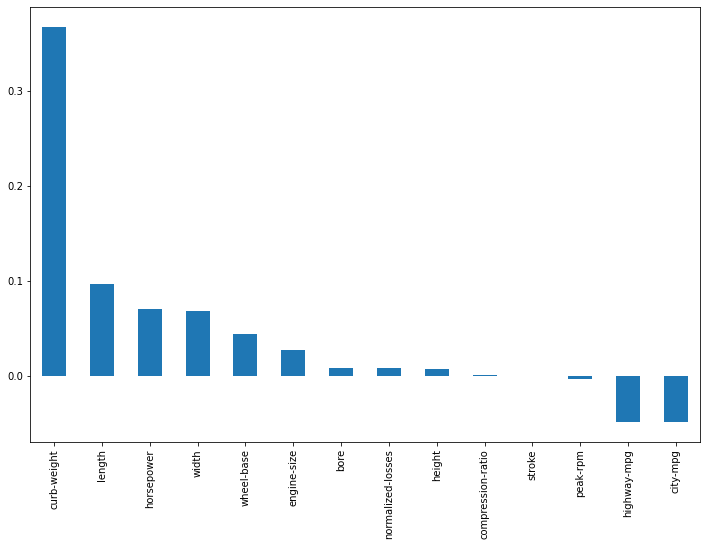

In [41]:
# Correlação das variáveis numéricas com o preço

plt.figure(figsize=(12,8))
# sns.heatmap(df['price'].corr(),annot=True,cmap='RdBu')
df.corr()['price'][:-1].sort_values(ascending=False).plot(kind='bar')

# **2 - Seleção de parametros** 

In [42]:
#new_df = df[['make', 'aspiration', 'num-of-doors', 'body-style',
       #'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       #'fuel-system','price','price_cat','symboling']]
       # 'curb-weight'

# PARA O PROJETO 2
new_df = gen_data_.copy()

### Proporção dos dados

In [43]:
round(new_df[new_df['price_cat']==0].shape[0]/new_df['price_cat'].shape[0], 2)*100

46.0

In [44]:
round(new_df[new_df['price_cat']==1].shape[0]/new_df['price_cat'].shape[0], 2)*100

46.0

In [45]:
round(new_df[new_df['price_cat']==2].shape[0]/new_df['price_cat'].shape[0], 2)*100

8.0

In [46]:
#selecionando 3000 amostras do dataset original
data0 = new_df[new_df['price_cat']==0].sample(4600)
data1 = new_df[new_df['price_cat']==1].sample(4600)
data2 = new_df[new_df['price_cat']==2].sample(800)

data = pd.concat([data0, data1, data2], ignore_index=True)

In [47]:
data['price_cat'].value_counts().sort_values() 

2.0     800
0.0    4600
1.0    4600
Name: price_cat, dtype: int64

# **Treinamento da Máquina**

In [48]:
# Bibliotecas dos Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Pré-processamento
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

#Funções de Validação
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, plot_roc_curve, roc_auc_score, plot_confusion_matrix, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

#plotar graficos ROCAUC
from yellowbrick.classifier import ROCAUC

import warnings
warnings.filterwarnings('ignore')

import time

### **One-Hot Encoding**

In [49]:
def onehotencoding(X_train, X_test):
    
#     xtr_col = X_train.columns
#     xte_col = X_test.columns
    
    # one-hot encode input variables
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoder.fit(X_train)
    X_train = onehot_encoder.transform(X_train)
    X_test = onehot_encoder.transform(X_test)
    
    #To dataframe
#     X_train = pd.DataFrame(X_train, columns=xtr_col)
#     X_test = pd.DataFrame(X_test, columns=xte_col)
    
    return X_train, X_test

# Projeto 2


In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import EditedNearestNeighbours, OneSidedSelection

In [51]:
# one hot encoding and concatening
def transforming_dataset(X):
  onehot_encoder = OneHotEncoder(sparse=False)
  onehot_encoder.fit(X)
  X = onehot_encoder.transform(X)

  return pd.DataFrame(X)

In [52]:
# Para o PCA e ENN
X1 = data.drop(['price_cat'], axis=1)
y1 = data['price_cat'].astype('category')

# após one hot encoding
X1_a = transforming_dataset(X1[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'symboling']])
X1_b = X1.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'symboling'], axis=1, inplace=True)

X1 = pd.concat([X1_b, X1_a], axis=1)

In [53]:
scaler = StandardScaler()
scaler.fit(X1)
X1 = pd.DataFrame(scaler.transform(X1))

In [54]:
%%time
# Aplicando CNN

# define the undersampling method
undersample = OneSidedSelection(n_neighbors=3, n_seeds_S=1500, n_jobs=-1, random_state=101)
# transform the dataset
X1, y1 = undersample.fit_resample(X1, y1)

Wall time: 3.17 s


In [55]:
y1.value_counts()

0.0    2148
1.0    2146
2.0     800
Name: price_cat, dtype: int64

In [56]:
# função pra treinar os algoritmos
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

## GridSearch

In [57]:
# função do GridSearch

def grids(grid_params, clf, X_train, y_train):
  grid = GridSearchCV(estimator = clf, param_grid=grid_params, scoring='accuracy', n_jobs=-1)
  grid.fit(X_train, y_train)
  #print("\n")
  #print("Best params: ", grid.best_params_)
  return grid.best_params_

## Parâmetros GridSearch

In [58]:
# parâmetros knn
knn_params = {
    'n_neighbors' : range(1,41,2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidian','manhattan','chebyshev']
}

# parâmetros mlp
mlp_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "max_iter" : [10,20],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
# parâmetros dt
dt_params = { 
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 10)} 

#parâmetros SVM 
svm_params = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

#parametros GNB
gnb_params = {
    'var_smoothing': np.logspace(0,-9, num=100)    
}
#parametros BNB
bnb_params = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}

## Treinamento dos modelos 

In [59]:
# função para recolher os resultados do modelo

def major_results(model, X_train, y_train, X_test, y_test, **kwargs):

  # lista para armazenar os dados
  accuracies = []
  f1_scores = []
  auc_list = []
  conf_mat = []

  #dicionário com todas listas
  partial_results = {
      'accuracy': accuracies,
      'f1': f1_scores,
      'auc_list': auc_list,
      'cm': conf_mat
  }

  #if option == 1:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_auc = model.predict_proba(X_test)


  #medindo e armazenando acurácia, f1-score e auc-score no dicionário
  accuracy = model.score(X_test, y_test)
  f1 = f1_score(y_test, y_pred, average='macro')
  AUC = roc_auc_score(y_test, y_pred_auc, average='macro', multi_class='ovr')
  conf_mat = confusion_matrix(y_test, y_pred)

  partial_results['accuracy'].append(accuracy)
  partial_results['f1'].append(f1)
  partial_results['auc_list'].append(AUC)
  partial_results['cm'].append(conf_mat)

  return partial_results


## Plot de curvas ROC

In [60]:
def plot_ROC_curve(model, X_train, y_train, X_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: '0', 
                                        1: '1', 
                                        2: '2'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

## Execução dos modelos e resultados

In [61]:
# função de avaliação dos modelos
def evaluate_model_with_skfold(skf):

  # Listas com os resultados
  knn_r, mlp_r, dt_r, svm_r, gnb_r, bnb_r, accuracies, f1_s, auc_s, result_matrix = [],[],[],[],[],[],[],[],[],[] 

  #dicionário com todas listas
  general_results = {
    'knn': knn_r,
    'mlp': mlp_r,
    'dt': dt_r,
    'svm': svm_r,
    'gnb': gnb_r,
    'bnb': bnb_r 
  }

  best_knn, best_mlp, best_dt, best_svm, best_gnb, best_bnb = {},{},{},{},{},{}  

  knn_mx, mlp_mx, dt_mx, svm_mx, gnb_mx, bnb_mx = 0, 0, 0, 0, 0, 0
  print('Aguarde, treinando os modelos ', end='')
  print('\n')
  i = 1
  for train, test in skf.split(X1, y1):
    X_train, X_test, y_train, y_test = X1.iloc[train], X1.iloc[test], y1.iloc[train], y1.iloc[test]

    print(f'{i}º Fold', end=': ')
    #for the kNN
    dict_knn = grids(knn_params, KNeighborsClassifier(),X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=dict_knn['n_neighbors'], weights=dict_knn['weights'], 
                                metric = dict_knn['metric'])    
    # retorna um dicionário com as métricas computadas
    result = major_results(knn, X_train, y_train, X_test, y_test, option = 1)
    
    # adiciona o dicionário de métricas na 
    knn_r.append(result)
    
    if np.array(result['auc_list']).max() >= knn_mx:
        knn_mx = np.array(result['auc_list']).max()
        knn_to_be_ploted = knn
        best_knn = dict_knn        
        
    print('kNN', end=' - ')

    #for the MLP

    dict_mlp = grids(mlp_params, MLPClassifier(),X_train, y_train)
    mlpc = MLPClassifier(alpha=dict_mlp['alpha'], hidden_layer_sizes=dict_mlp['hidden_layer_sizes'],
                         max_iter=dict_mlp['max_iter'], solver=dict_mlp['solver'], activation=dict_mlp['activation'])
    result = major_results(mlpc, X_train, y_train, X_test, y_test, option = 1)
    mlp_r.append(result)

    if np.array(result['auc_list']).max() >= mlp_mx:
        mlp_mx = np.array(result['auc_list']).max()
        mlp_to_be_ploted = mlpc
        best_mlp = dict_mlp     
    
    print('MLP', end=' - ')
     
    #for the DT
    
    dict_dt = grids(dt_params, DecisionTreeClassifier(), X_train, y_train)
    dtc = DecisionTreeClassifier(criterion=dict_dt['criterion'], max_depth=dict_dt['max_depth'])
    result = major_results(dtc, X_train, y_train, X_test, y_test, option = 1)
    dt_r.append(result)
    
    if np.array(result['auc_list']).max() >= dt_mx:
        dt_mx = np.array(result['auc_list']).max()
        dt_to_be_ploted = dtc
        best_dt = dict_dt     
    print('DT', end=' - ')
    
    #for the SVM
    
    dict_svm = grids(svm_params, SVC(), X_train, y_train)
    svm = SVC(C=dict_svm['C'], gamma=dict_svm['gamma'], kernel=dict_svm['kernel'], probability=True)
    result = major_results(svm, X_train, y_train, X_test, y_test, option = 1)
    svm_r.append(result)
    
    if np.array(result['auc_list']).max() >= svm_mx:
        svm_mx = np.array(result['auc_list']).max()
        svm_to_be_ploted = svm
        best_svm = dict_svm    
    
    print('SVM', end=' - ')
    
    #for the GNB
    
    dict_gnb = grids(gnb_params, GaussianNB(), X_train, y_train)
    gnb = GaussianNB(var_smoothing=dict_gnb['var_smoothing'])
    result = major_results(gnb, X_train, y_train, X_test, y_test, option = 1)
    gnb_r.append(result)
    
    if np.array(result['auc_list']).max() >= svm_mx:
        gnb_mx = np.array(result['auc_list']).max()
        gnb_to_be_ploted = gnb
        best_gnb = dict_gnb     
    
    print('GNB', end=' - ')
    
    #for the BNB
    
    dict_bnb = grids(bnb_params, BernoulliNB(), X_train, y_train)
    bnb = BernoulliNB(alpha=dict_bnb['alpha'])
    result = major_results(bnb, X_train, y_train, X_test, y_test, option = 1)
    bnb_r.append(result)
    
    if np.array(result['auc_list']).max() >= svm_mx:
        bnb_mx = np.array(result['auc_list']).max()
        bnb_to_be_ploted = bnb
        best_bnb = dict_bnb     
    
    print('BNB', end = ' ')
    print('\n')

    i = i+1

  knn_r.append(knn_to_be_ploted)
  mlp_r.append(mlp_to_be_ploted)
  dt_r.append(dt_to_be_ploted)
  svm_r.append(svm_to_be_ploted)
  gnb_r.append(gnb_to_be_ploted)
  bnb_r.append(bnb_to_be_ploted)

  general_results['knn'] = knn_r
  general_results['mlp'] = mlp_r
  general_results['dt'] = dt_r
  general_results['svm'] = svm_r
  general_results['gnb'] = gnb_r
  general_results['bnb'] = bnb_r

  print('\n')
  for k, v in general_results.items():
    for item in v[:-2]:
      accuracies.append(item['accuracy'])
      f1_s.append(item['f1'])
      auc_s.append(item['auc_list'])
      result_matrix.append(np.array(item['cm']))


    print(f'Model: {k}\n')
    print("Acurácia média (desvio): %.6f +- (%.6f)" %(np.array(accuracies).mean(), np.array(accuracies).std()))
    print("F1-score média (desvio): %.6f +- (%.6f)" %(np.array(f1_s).mean(), np.array(f1_s).std()))
    print("AUC média (desvio): %.6f +- (%.6f)\n" %(np.array(auc_s).mean(), np.array(auc_s).std()))
    print(f"Matriz de Confusão:  \n{sum(result_matrix)*0.1}\n")
    print('\n')
    print('A curva ROC com do modelo de maior AUC é: \n')

    plot_ROC_curve(v[-1], X_train, y_train, X_test, y_test)

    accuracies, f1_s, auc_s, result_matrix = [], [], [], []
    
    print("Best params kNN: ", best_knn)
    print("Best params MLP: ", best_mlp)
    print("Best params DT: ", best_dt)
    print("Best params SVM: ", best_svm)
    print("Best params GNB: ", best_gnb)
    print("Best params BNB: ", best_bnb)
    
    


## Execução e Resultados

Aguarde, treinando os modelos 

1º Fold: kNN - MLP - DT - SVM - GNB - BNB 

2º Fold: kNN - MLP - DT - SVM - GNB - BNB 

3º Fold: kNN - MLP - DT - SVM - GNB - BNB 

4º Fold: kNN - MLP - DT - SVM - GNB - BNB 

5º Fold: kNN - MLP - DT - SVM - GNB - BNB 

6º Fold: kNN - MLP - DT - SVM - GNB - BNB 

7º Fold: kNN - MLP - DT - SVM - GNB - BNB 

8º Fold: kNN - MLP - DT - SVM - GNB - BNB 

9º Fold: kNN - MLP - DT - SVM - GNB - BNB 

10º Fold: kNN - MLP - DT - SVM - GNB - BNB 



Model: knn

Acurácia média (desvio): 0.503375 +- (0.012191)
F1-score média (desvio): 0.370677 +- (0.014484)
AUC média (desvio): 0.621056 +- (0.011640)

Matriz de Confusão:  
[[[120.1  71.7   1.6]
  [ 80.7 110.    2.4]
  [ 35.7  35.6   0.7]]]



A curva ROC com do modelo de maior AUC é: 



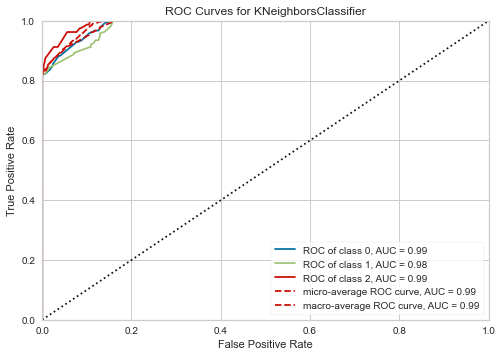

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}
Best params DT:  {'criterion': 'gini', 'max_depth': 3}
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best params GNB:  {'var_smoothing': 1.0}
Best params BNB:  {'alpha': 1}
Model: mlp

Acurácia média (desvio): 0.473710 +- (0.021936)
F1-score média (desvio): 0.341291 +- (0.015911)
AUC média (desvio): 0.557671 +- (0.016213)

Matriz de Confusão:  
[[[103.2  90.2   0. ]
  [ 79.1 114.    0. ]
  [ 30.9  41.1   0. ]]]



A curva ROC com do modelo de maior AUC é: 



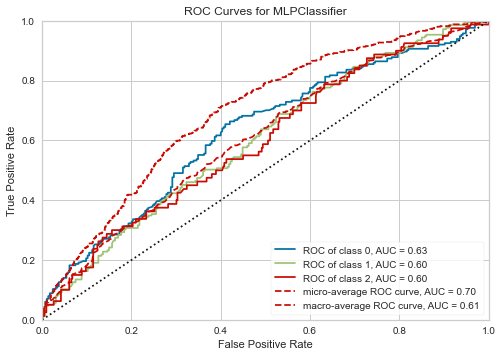

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}
Best params DT:  {'criterion': 'gini', 'max_depth': 3}
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best params GNB:  {'var_smoothing': 1.0}
Best params BNB:  {'alpha': 1}
Model: dt

Acurácia média (desvio): 0.491158 +- (0.022556)
F1-score média (desvio): 0.351873 +- (0.016726)
AUC média (desvio): 0.556699 +- (0.016871)

Matriz de Confusão:  
[[[8.980e+01 1.036e+02 0.000e+00]
  [5.760e+01 1.354e+02 1.000e-01]
  [2.490e+01 4.710e+01 0.000e+00]]]



A curva ROC com do modelo de maior AUC é: 



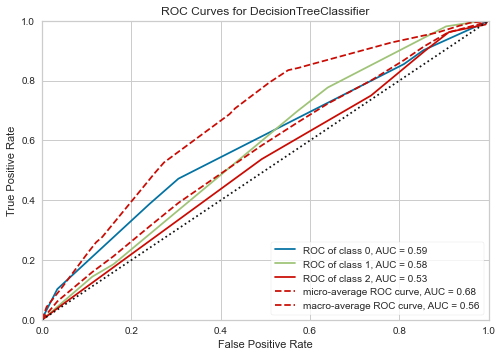

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}
Best params DT:  {'criterion': 'gini', 'max_depth': 3}
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best params GNB:  {'var_smoothing': 1.0}
Best params BNB:  {'alpha': 1}
Model: svm

Acurácia média (desvio): 0.489415 +- (0.019062)
F1-score média (desvio): 0.352985 +- (0.013734)
AUC média (desvio): 0.551640 +- (0.017419)

Matriz de Confusão:  
[[[ 99.4  94.    0. ]
  [ 68.1 125.    0. ]
  [ 28.7  43.3   0. ]]]



A curva ROC com do modelo de maior AUC é: 



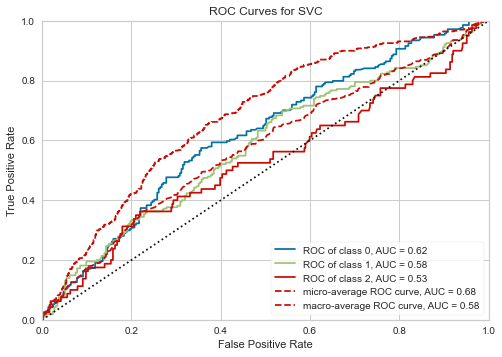

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}
Best params DT:  {'criterion': 'gini', 'max_depth': 3}
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best params GNB:  {'var_smoothing': 1.0}
Best params BNB:  {'alpha': 1}
Model: gnb

Acurácia média (desvio): 0.450369 +- (0.019459)
F1-score média (desvio): 0.326389 +- (0.016543)
AUC média (desvio): 0.543153 +- (0.020968)

Matriz de Confusão:  
[[[146.3  43.1   4. ]
  [129.3  58.3   5.5]
  [ 48.7  21.4   1.9]]]



A curva ROC com do modelo de maior AUC é: 



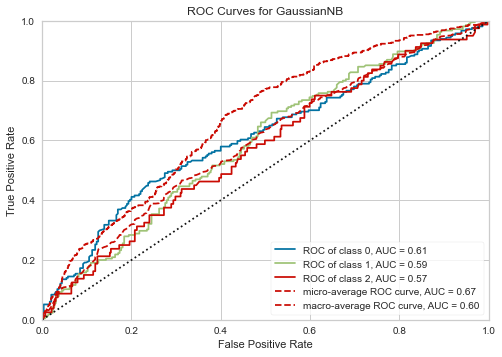

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}
Best params DT:  {'criterion': 'gini', 'max_depth': 3}
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best params GNB:  {'var_smoothing': 1.0}
Best params BNB:  {'alpha': 1}
Model: bnb

Acurácia média (desvio): 0.472838 +- (0.021759)
F1-score média (desvio): 0.345369 +- (0.015564)
AUC média (desvio): 0.560036 +- (0.017486)

Matriz de Confusão:  
[[[108.9  82.2   2.3]
  [ 83.2 107.7   2.2]
  [ 32.   39.8   0.2]]]



A curva ROC com do modelo de maior AUC é: 



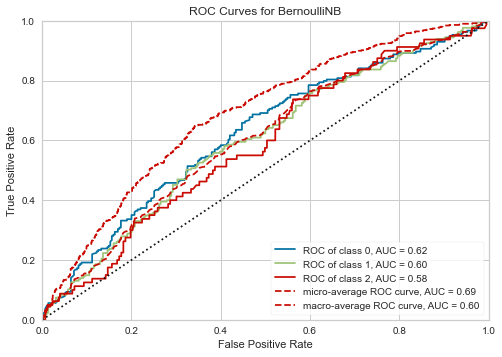

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'}
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}
Best params DT:  {'criterion': 'gini', 'max_depth': 3}
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best params GNB:  {'var_smoothing': 1.0}
Best params BNB:  {'alpha': 1}
Wall time: 49min 42s


In [62]:
%%time 

evaluate_model_with_skfold(skf)

### Best params

Best params do fold com o melhor (maior) resultado da AUC. <br>

Best params kNN:  {'metric': 'manhattan', 'n_neighbors': 37, 'weights': 'distance'} <br>
Best params MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 20, 'solver': 'adam'}<br>
Best params DT:  {'criterion': 'gini', 'max_depth': 3}<br>
Best params SVM:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}<br>
Best params GNB:  {'var_smoothing': 1.0}<br>
Best params BNB:  {'alpha': 1}<br>

# Parte 2


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## Treino feito com PCA

In [66]:
# função de avaliação dos modelos
def evaluate_model_with_skfold2(skf):
    
    i = 1

    # Listas com os resultados
    knn_r, mlp_r, dt_r, svm_r, gnb_r, bnb_r = [] , [], [], [], [], []
    accuracies, f1_s, auc_s, result_matrix = [], [], [], []

    #dicionário com todas listas
    general_results = {
    'knn': knn_r,
    'mlp': mlp_r,
    'dt': dt_r,
    'svm': svm_r,
    'gnb': gnb_r,
    'bnb': bnb_r
    }

    knn_mx, mlp_mx, dt_mx, svm_mx, gnb_mx, bnb_mx = 0, 0, 0, 0, 0, 0
    print('Aguarde, treinando os modelos: ')
    for train, test in skf.split(X1, y1):
        #X_train, X_test = onehotencoding(X.iloc[train], X.iloc[test])
        X_train, X_test = (X1.iloc[train], X1.iloc[test])
        y_train, y_test = (y1.iloc[train], y1.iloc[test])
        
        print(f'{i}º Fold', end=': ')

        # Pipeline knn
        steps = [('pca', PCA(n_components=0.95)), 
                 ('knn', KNeighborsClassifier(n_neighbors=37, weights='distance', 
                                    metric = 'manhattan'))]
        model_knn = Pipeline(steps=steps)

        # retorna um dicionário com as métricas computadas
        result = major_results(model_knn, X_train, y_train, X_test, y_test)
        # adiciona o dicionário de métricas na 
        knn_r.append(result)

        if np.array(result['auc_list']).max() >= knn_mx:
            knn_mx = np.array(result['auc_list']).max()
            knn_to_be_ploted = [model_knn, X_train, y_train, X_test, y_test]
        
        print('kNN', end=' - ')

        #for the MLP

        # Pipeline mlp
        steps = [('pca', PCA(n_components=0.95)), ('mlp', 
                                                   MLPClassifier(activation='logistic', 
                                                                 alpha=0.0001,
                                                                 hidden_layer_sizes=(100, 100),
                                                                 max_iter=20,
                                                                 solver='adam'))]
        model_mlp = Pipeline(steps=steps)

        result = major_results(model_mlp, X_train, y_train, X_test, y_test)
        mlp_r.append(result)

        if np.array(result['auc_list']).max() >= mlp_mx:
            mlp_mx = np.array(result['auc_list']).max()
            mlp_to_be_ploted = [model_mlp, X_train, y_train, X_test, y_test]
            
        print('MLP', end=' - ')
        
        #for the DT

        # Pipeline DT
        steps = [('pca', PCA(n_components=0.95)), 
                 ('dt', DecisionTreeClassifier(criterion='gini', max_depth=3))]
        model_dt = Pipeline(steps=steps)

        result = major_results(model_dt, X_train, y_train, X_test, y_test)
        dt_r.append(result)

        if np.array(result['auc_list']).max() >= dt_mx:
            dt_mx = np.array(result['auc_list']).max()
            dt_to_be_ploted = [model_dt, X_train, y_train, X_test, y_test]
            
        print('DT', end=' - ')
        
        #for the SVM

        # Pipeline SVM
        steps = [('pca', PCA(n_components=0.95)), ('svm', SVC(C=1, gamma=0.01, kernel='rbf', probability=True))]
        model_svm = Pipeline(steps=steps)

        result = major_results(model_svm, X_train, y_train, X_test, y_test)
        svm_r.append(result)

        if np.array(result['auc_list']).max() >= svm_mx:
            svm_mx = np.array(result['auc_list']).max()
            svm_to_be_ploted = [model_svm, X_train, y_train, X_test, y_test]
        
        print('SVM', end=' - ')
            
        #for the Gaussian NB

        # Pipeline GNB
        steps = [('pca', PCA(n_components=0.95)), ('gnb', GaussianNB(var_smoothing=1.0))]
        model_gnb = Pipeline(steps=steps)

        result = major_results(model_gnb, X_train, y_train, X_test, y_test)
        gnb_r.append(result)

        if np.array(result['auc_list']).max() >= gnb_mx:
            gnb_mx = np.array(result['auc_list']).max()
            gnb_to_be_ploted = [model_gnb, X_train, y_train, X_test, y_test]
        
        print('GNB', end=' - ')
            
        #for the Bernoulli NB

        # Pipeline BNB
        steps = [('pca', PCA(n_components=0.95)), ('bnb', BernoulliNB(alpha=1))]
        model_bnb = Pipeline(steps=steps)

        result = major_results(model_bnb, X_train, y_train, X_test, y_test)
        bnb_r.append(result)

        if np.array(result['auc_list']).max() >= bnb_mx:
            bnb_mx = np.array(result['auc_list']).max()
            bnb_to_be_ploted = [model_bnb, X_train, y_train, X_test, y_test]
        
        print('BNB')
        i += 1

    # Adicionando itens a serem plotados nas listas
    knn_r.append(knn_to_be_ploted)
    mlp_r.append(mlp_to_be_ploted)
    dt_r.append(dt_to_be_ploted)
    svm_r.append(svm_to_be_ploted)
    gnb_r.append(gnb_to_be_ploted)
    bnb_r.append(bnb_to_be_ploted)
    
    # atribuindo listas aos dicionários
    general_results['knn'] = knn_r
    general_results['mlp'] = mlp_r
    general_results['dt'] = dt_r
    general_results['svm'] = svm_r
    general_results['gnb'] = gnb_r
    general_results['bnb'] = bnb_r

    print('\n')
    
    # percorrendo o dicionário e adicionando as métricas para calcular média
    for k, v in general_results.items():
        for item in v[:-2]:
          accuracies.append(item['accuracy'])
          f1_s.append(item['f1'])
          auc_s.append(item['auc_list'])
          result_matrix.append(np.array(item['cm']))


        print('\n')
        # exibição dos resultados
        print(f'Modelo: {k}\n')
        print("Acurácia média (desvio): %.6f +- (%.6f)" %(np.array(accuracies).mean(), np.array(accuracies).std()))
        print("F1-score média (desvio): %.6f +- (%.6f)" %(np.array(f1_s).mean(), np.array(f1_s).std()))
        print("AUC média (desvio): %.6f +- (%.6f)\n" %(np.array(auc_s).mean(), np.array(auc_s).std()))
        print(f"Matriz de Confusão:  \n{sum(result_matrix)*0.1}\n")
        print('\n')
        print('A curva ROC com do modelo de maior AUC é: \n')

        plot_ROC_curve(v[-1][0], v[-1][1], v[-1][2], v[-1][3], v[-1][4])
        
        accuracies, f1_s, auc_s, result_matrix = [], [], [], []

Aguarde, treinando os modelos: 
1º Fold: kNN - MLP - DT - SVM - GNB - BNB
2º Fold: kNN - MLP - DT - SVM - GNB - BNB
3º Fold: kNN - MLP - DT - SVM - GNB - BNB
4º Fold: kNN - MLP - DT - SVM - GNB - BNB
5º Fold: kNN - MLP - DT - SVM - GNB - BNB
6º Fold: kNN - MLP - DT - SVM - GNB - BNB
7º Fold: kNN - MLP - DT - SVM - GNB - BNB
8º Fold: kNN - MLP - DT - SVM - GNB - BNB
9º Fold: kNN - MLP - DT - SVM - GNB - BNB
10º Fold: kNN - MLP - DT - SVM - GNB - BNB




Modelo: knn

Acurácia média (desvio): 0.487238 +- (0.011355)
F1-score média (desvio): 0.357824 +- (0.011392)
AUC média (desvio): 0.601968 +- (0.016603)

Matriz de Confusão:  
[[[123.2  68.8   1.4]
  [ 91.4  99.5   2.2]
  [ 38.7  32.6   0.7]]]



A curva ROC com do modelo de maior AUC é: 



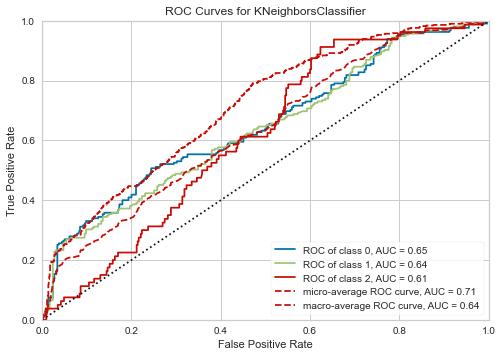



Modelo: mlp

Acurácia média (desvio): 0.468916 +- (0.023682)
F1-score média (desvio): 0.338127 +- (0.017339)
AUC média (desvio): 0.552163 +- (0.018935)

Matriz de Confusão:  
[[[112.5  80.9   0. ]
  [ 90.6 102.5   0. ]
  [ 34.5  37.5   0. ]]]



A curva ROC com do modelo de maior AUC é: 



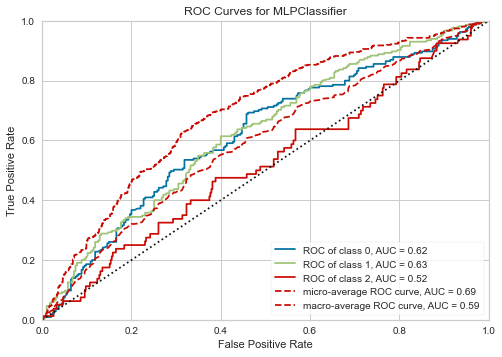



Modelo: dt

Acurácia média (desvio): 0.443402 +- (0.019993)
F1-score média (desvio): 0.313736 +- (0.014180)
AUC média (desvio): 0.522302 +- (0.029151)

Matriz de Confusão:  
[[[102.6  90.8   0. ]
  [ 92.2 100.7   0.2]
  [ 35.7  36.3   0. ]]]



A curva ROC com do modelo de maior AUC é: 



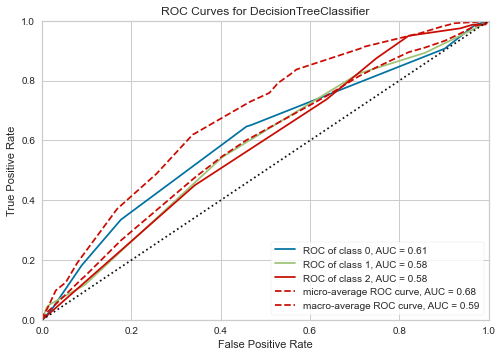



Modelo: svm

Acurácia média (desvio): 0.482219 +- (0.018039)
F1-score média (desvio): 0.348364 +- (0.012684)
AUC média (desvio): 0.548128 +- (0.016903)

Matriz de Confusão:  
[[[104.4  89.    0. ]
  [ 76.4 116.7   0. ]
  [ 30.9  41.1   0. ]]]



A curva ROC com do modelo de maior AUC é: 



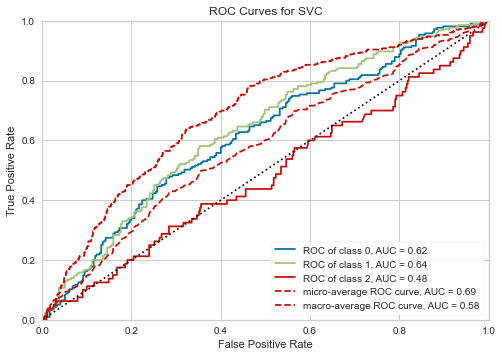



Modelo: gnb

Acurácia média (desvio): 0.435330 +- (0.011663)
F1-score média (desvio): 0.256044 +- (0.011654)
AUC média (desvio): 0.555148 +- (0.021439)

Matriz de Confusão:  
[[[177.7  15.7   0. ]
  [171.2  21.9   0. ]
  [ 64.7   7.3   0. ]]]



A curva ROC com do modelo de maior AUC é: 



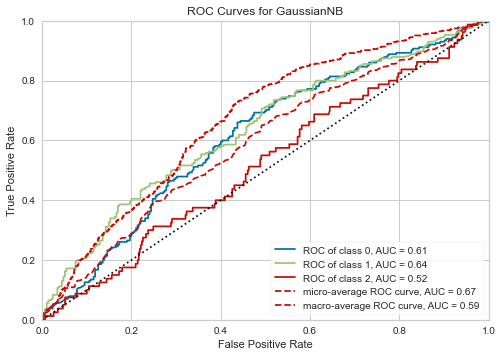



Modelo: bnb

Acurácia média (desvio): 0.458448 +- (0.021657)
F1-score média (desvio): 0.331590 +- (0.015683)
AUC média (desvio): 0.540745 +- (0.022476)

Matriz de Confusão:  
[[[1.037e+02 8.970e+01 0.000e+00]
  [8.650e+01 1.065e+02 1.000e-01]
  [3.450e+01 3.750e+01 0.000e+00]]]



A curva ROC com do modelo de maior AUC é: 



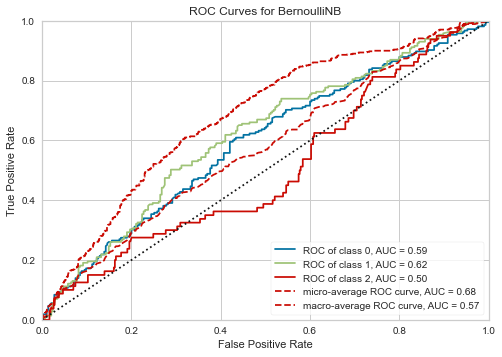

Wall time: 4min 12s


In [67]:
%%time
evaluate_model_with_skfold2(skf)

## Treino Feito com ENN

In [68]:
#from imblearn.pipeline import Pipeline
#from imblearn.combine import SMOTEENN

In [69]:
# função de avaliação dos modelos
def evaluate_model_with_skfold3(skf):
    
    i = 1

    # Listas com os resultados
    knn_r, mlp_r, dt_r, svm_r, gnb_r, bnb_r = [] , [], [], [], [], []
    accuracies, f1_s, auc_s, result_matrix = [], [], [], []

    #dicionário com todas listas
    general_results = {
    'knn': knn_r,
    'mlp': mlp_r,
    'dt': dt_r,
    'svm': svm_r,
    'gnb': gnb_r,
    'bnb': bnb_r
    }

    knn_mx, mlp_mx, dt_mx, svm_mx, gnb_mx, bnb_mx = 0, 0, 0, 0, 0, 0
    
    
    print('Aguarde, treinando os modelos: ')
    for train, test in skf.split(X1, y1):
        #X_train, X_test = onehotencoding(X.iloc[train], X.iloc[test])
        X_train, X_test = (X1.iloc[train], X1.iloc[test])
        y_train, y_test = (y1.iloc[train], y1.iloc[test])
        
        resample = EditedNearestNeighbours(n_neighbors=5, sampling_strategy="auto", kind_sel="mode", n_jobs=-1)
        X_enn, y_enn = resample.fit_resample(X_train, y_train)
        
        #for the kNN
        
        print(f'{i}º Fold', end=': ')

        knn = KNeighborsClassifier(n_neighbors=37, weights='distance', 
                                    metric = 'manhattan')
        
        model_knn=Pipeline(steps=[('m', knn)])
        result = major_results(model_knn, X_enn, y_enn, X_test, y_test)
        # adiciona o dicionário de métricas na 
        knn_r.append(result)

        if np.array(result['auc_list']).max() >= knn_mx:
            knn_mx = np.array(result['auc_list']).max()
            knn_to_be_ploted = [model_knn, X_enn, y_enn, X_test, y_test]
        
        print('kNN', end=' - ')

        # #for the MLP
        
        mlpc = MLPClassifier(activation='logistic', 
                                                                 alpha=0.0001,
                                                                 hidden_layer_sizes=(100, 100),
                                                                 max_iter=20,
                                                                 solver='adam')
        
        model_mlp=Pipeline(steps=[('m', mlpc)])
        result = major_results(model_mlp, X_enn, y_enn, X_test, y_test)
        mlp_r.append(result)

        if np.array(result['auc_list']).max() >= mlp_mx:
             mlp_mx = np.array(result['auc_list']).max()
             mlp_to_be_ploted = [model_mlp, X_enn, y_enn, X_test, y_test]
            
        print('MLP', end=' - ')
        
        # #for the DT
  
        dtm = DecisionTreeClassifier(criterion='gini', max_depth=3)
        model_dt=Pipeline(steps=[('m', dtm)])
        result = major_results(model_dt, X_enn, y_enn, X_test, y_test)
        dt_r.append(result)

        if np.array(result['auc_list']).max() >= dt_mx:
            dt_mx = np.array(result['auc_list']).max()
            dt_to_be_ploted = [model_dt, X_enn, y_enn, X_test, y_test]
            
        print('DT', end=' - ')
        
        # #for the SVM

        svmm = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)
        model_svm=Pipeline(steps=[('m', svmm)])
        result = major_results(model_svm, X_enn, y_enn, X_test, y_test)
        svm_r.append(result)

        if np.array(result['auc_list']).max() >= svm_mx:
            svm_mx = np.array(result['auc_list']).max()
            svm_to_be_ploted = [model_svm, X_enn, y_enn, X_test, y_test]
        
        print('SVM', end=' - ')
            
        # #for the Gaussian NB

        gnb = GaussianNB(var_smoothing=1.0)
        model_gnb=Pipeline(steps=[('m', gnb)])
        result = major_results(model_gnb, X_enn, y_enn, X_test, y_test)
        gnb_r.append(result)

        if np.array(result['auc_list']).max() >= gnb_mx:
            gnb_mx = np.array(result['auc_list']).max()
            gnb_to_be_ploted = [model_gnb, X_enn, y_enn, X_test, y_test]
        
        print('GNB', end=' - ')
            
        # #for the Bernoulli NB

        bnb = BernoulliNB(alpha=1)
        model_bnb=Pipeline(steps=[('m', bnb)])
        result = major_results(model_bnb, X_enn, y_enn, X_test, y_test)
        bnb_r.append(result)

        if np.array(result['auc_list']).max() >= bnb_mx:
            bnb_mx = np.array(result['auc_list']).max()
            bnb_to_be_ploted = [model_bnb, X_enn, y_enn, X_test, y_test]
        
        print('BNB')
        i += 1

    # Adicionando itens a serem plotados nas listas
    knn_r.append(knn_to_be_ploted)
    mlp_r.append(mlp_to_be_ploted)
    dt_r.append(dt_to_be_ploted)
    svm_r.append(svm_to_be_ploted)
    gnb_r.append(gnb_to_be_ploted)
    bnb_r.append(bnb_to_be_ploted)
    
    # atribuindo listas aos dicionários
    general_results['knn'] = knn_r
    general_results['mlp'] = mlp_r
    general_results['dt'] = dt_r
    general_results['svm'] = svm_r
    general_results['gnb'] = gnb_r
    general_results['bnb'] = bnb_r

    print('\n')
    
    # percorrendo o dicionário e adicionando as métricas para calcular média
    for k, v in general_results.items():
        for item in v[:-2]:
          accuracies.append(item['accuracy'])
          f1_s.append(item['f1'])
          auc_s.append(item['auc_list'])
          result_matrix.append(np.array(item['cm']))


        print('\n')
        # exibição dos resultados
        print(f'Modelo: {k}\n')
        print("Acurácia média (desvio): %.6f +- (%.6f)" %(np.array(accuracies).mean(), np.array(accuracies).std()))
        print("F1-score média (desvio): %.6f +- (%.6f)" %(np.array(f1_s).mean(), np.array(f1_s).std()))
        print("AUC média (desvio): %.6f +- (%.6f)\n" %(np.array(auc_s).mean(), np.array(auc_s).std()))
        print(f"Matriz de Confusão:  \n{sum(result_matrix)*0.1}\n")
        print('\n')
        print('A curva ROC com do modelo de maior AUC é: \n')

        plot_ROC_curve(v[-1][0], v[-1][1], v[-1][2], v[-1][3], v[-1][4])
        
        accuracies, f1_s, auc_s, result_matrix = [], [], [], []

Aguarde, treinando os modelos: 
1º Fold: kNN - MLP - DT - SVM - GNB - BNB
2º Fold: kNN - MLP - DT - SVM - GNB - BNB
3º Fold: kNN - MLP - DT - SVM - GNB - BNB
4º Fold: kNN - MLP - DT - SVM - GNB - BNB
5º Fold: kNN - MLP - DT - SVM - GNB - BNB
6º Fold: kNN - MLP - DT - SVM - GNB - BNB
7º Fold: kNN - MLP - DT - SVM - GNB - BNB
8º Fold: kNN - MLP - DT - SVM - GNB - BNB
9º Fold: kNN - MLP - DT - SVM - GNB - BNB
10º Fold: kNN - MLP - DT - SVM - GNB - BNB




Modelo: knn

Acurácia média (desvio): 0.432483 +- (0.020338)
F1-score média (desvio): 0.348204 +- (0.023859)
AUC média (desvio): 0.560354 +- (0.017532)

Matriz de Confusão:  
[[[124.9  54.5  14. ]
  [107.8  66.8  18.5]
  [ 40.7  24.7   6.6]]]



A curva ROC com do modelo de maior AUC é: 



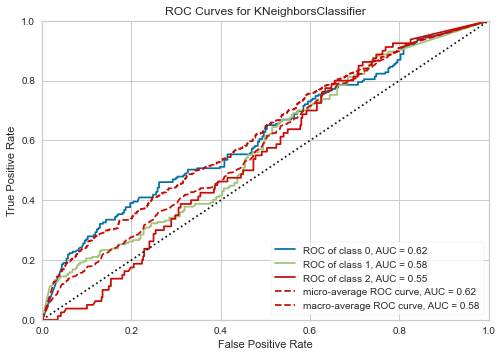



Modelo: mlp

Acurácia média (desvio): 0.443184 +- (0.012623)
F1-score média (desvio): 0.361425 +- (0.020670)
AUC média (desvio): 0.555393 +- (0.015502)

Matriz de Confusão:  
[[[118.3  58.2  16.9]
  [ 97.9  78.   17.2]
  [ 37.4  27.7   6.9]]]



A curva ROC com do modelo de maior AUC é: 



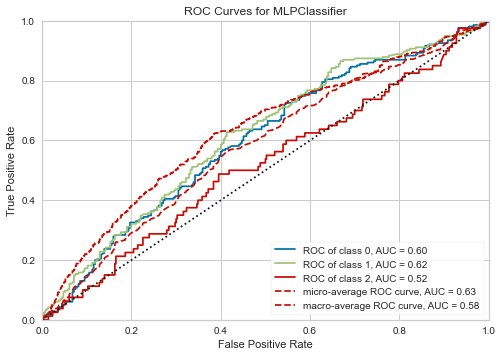



Modelo: dt

Acurácia média (desvio): 0.482662 +- (0.026968)
F1-score média (desvio): 0.353692 +- (0.023535)
AUC média (desvio): 0.557236 +- (0.019069)

Matriz de Confusão:  
[[[ 94.2  97.3   1.9]
  [ 64.7 126.    2.4]
  [ 28.2  42.7   1.1]]]



A curva ROC com do modelo de maior AUC é: 



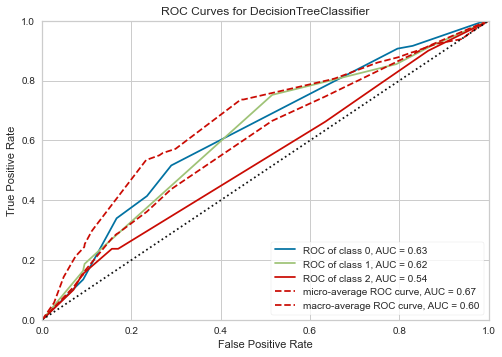



Modelo: svm

Acurácia média (desvio): 0.437505 +- (0.012733)
F1-score média (desvio): 0.361997 +- (0.014343)
AUC média (desvio): 0.544921 +- (0.014288)

Matriz de Confusão:  
[[[118.   57.8  17.6]
  [100.8  74.5  17.8]
  [ 36.2  27.7   8.1]]]



A curva ROC com do modelo de maior AUC é: 



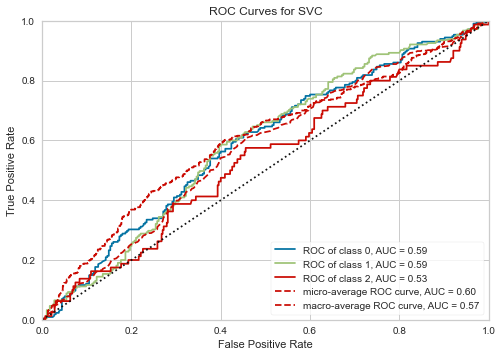



Modelo: gnb

Acurácia média (desvio): 0.427912 +- (0.023206)
F1-score média (desvio): 0.323986 +- (0.025486)
AUC média (desvio): 0.541185 +- (0.019865)

Matriz de Confusão:  
[[[144.5  35.3  13.6]
  [131.1  46.4  15.6]
  [ 48.6  18.1   5.3]]]



A curva ROC com do modelo de maior AUC é: 



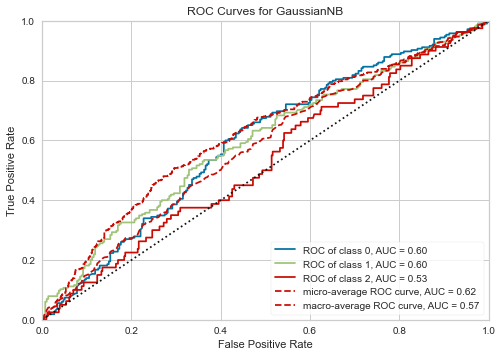



Modelo: bnb

Acurácia média (desvio): 0.430094 +- (0.013023)
F1-score média (desvio): 0.372577 +- (0.014094)
AUC média (desvio): 0.554808 +- (0.016990)

Matriz de Confusão:  
[[[107.   60.8  25.6]
  [ 87.1  78.3  27.7]
  [ 31.9  28.2  11.9]]]



A curva ROC com do modelo de maior AUC é: 



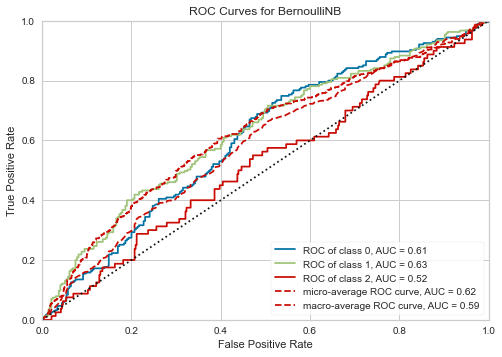

Wall time: 54.6 s


In [70]:
%%time
evaluate_model_with_skfold3(skf)

## Treino feito com o ENN + PCA

In [71]:
# função de avaliação dos modelos ENN + PCA
def evaluate_model_with_skfold_4(skf):
    
    i = 1

    # Listas com os resultados
    knn_r, mlp_r, dt_r, svm_r, gnb_r, bnb_r = [] , [], [], [], [], []
    accuracies, f1_s, auc_s, result_matrix = [], [], [], []

    #dicionário com todas listas
    general_results = {
    'knn': knn_r,
    'mlp': mlp_r,
    'dt': dt_r,
    'svm': svm_r,
    'gnb': gnb_r,
    'bnb': bnb_r
    }

    knn_mx, mlp_mx, dt_mx, svm_mx, gnb_mx, bnb_mx = 0, 0, 0, 0, 0, 0
    print('Aguarde, treinando os modelos: ')
    for train, test in skf.split(X1, y1):
        # X_train, X_test = onehotencoding(X.iloc[train], X.iloc[test])
        X_train, X_test = (X1.iloc[train], X1.iloc[test])
        y_train, y_test = (y1.iloc[train], y1.iloc[test])

        # Para o ENN
        undersample = EditedNearestNeighbours(n_neighbors=5, sampling_strategy="auto", kind_sel="mode", n_jobs=-1)
        X_enn, y_enn = undersample.fit_resample(X_train, y_train)
        
        print(f'{i}º Fold', end=': ')

        #for the kNN
        # dict_knn = grids(knn_params, KNeighborsClassifier(),X_train, y_train)
        knn = KNeighborsClassifier(n_neighbors=37, weights='distance', 
                                    metric = 'manhattan')

        # Pipeline knn
        steps = [('pca', PCA(n_components=0.95)), ('knn', knn)]
        model_knn = Pipeline(steps=steps)

        # retorna um dicionário com as métricas computadas
        result = major_results(model_knn, X_enn, y_enn, X_test, y_test)
        # adiciona o dicionário de métricas na 
        knn_r.append(result)

        if np.array(result['auc_list']).max() >= knn_mx:
            knn_mx = np.array(result['auc_list']).max()
            knn_to_be_ploted = [model_knn, X_enn, y_enn, X_test, y_test]
        
        print('kNN', end=' - ')

        #for the MLP

        # dict_mlp = grids(mlp_params, MLPClassifier(), X_train, y_train)
        mlpc = MLPClassifier(activation='logistic', 
                                                                 alpha=0.0001,
                                                                 hidden_layer_sizes=(100, 100),
                                                                 max_iter=20,
                                                                 solver='adam')

        # Pipeline mlp
        steps = [('pca', PCA(n_components=0.95)), ('mlp', mlpc)]
        model_mlp = Pipeline(steps=steps)

        result = major_results(model_mlp, X_enn, y_enn, X_test, y_test)
        mlp_r.append(result)

        if np.array(result['auc_list']).max() >= mlp_mx:
            mlp_mx = np.array(result['auc_list']).max()
            mlp_to_be_ploted = [model_mlp, X_enn, y_enn, X_test, y_test]
            
        print('MLP', end=' - ')
        
        #for the DT

        # dict_dt = grids(dt_params, DecisionTreeClassifier(), X_train, y_train)
        dtm = DecisionTreeClassifier(criterion='gini', max_depth=3)

        # Pipeline DT
        steps = [('pca', PCA(n_components=0.95)), ('dt', dtm)]
        model_dt = Pipeline(steps=steps)

        result = major_results(model_dt, X_enn, y_enn, X_test, y_test)
        dt_r.append(result)

        if np.array(result['auc_list']).max() >= dt_mx:
            dt_mx = np.array(result['auc_list']).max()
            dt_to_be_ploted = [model_dt, X_enn, y_enn, X_test, y_test]
            
        print('DT', end=' - ')
        
        #for the SVM

        # dict_svm = grids(svm_params, SVC(), X_train, y_train)
        svmm = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

        # Pipeline SVM
        steps = [('pca', PCA(n_components=0.95)), ('svm', svmm)]
        model_svm = Pipeline(steps=steps)

        result = major_results(model_svm, X_enn, y_enn, X_test, y_test)
        svm_r.append(result)

        if np.array(result['auc_list']).max() >= svm_mx:
            svm_mx = np.array(result['auc_list']).max()
            svm_to_be_ploted = [model_svm, X_enn, y_enn, X_test, y_test]
        
        print('SVM', end=' - ')
            
        #for the Gaussian NB

        # dict_gnb = grids(gnb_params, GaussianNB(), X_train, y_train)
        gnb = GaussianNB(var_smoothing=1.0)

        # Pipeline GNB
        steps = [('pca', PCA(n_components=0.95)), ('gnb', gnb)]
        model_gnb = Pipeline(steps=steps)

        result = major_results(model_gnb, X_enn, y_enn, X_test, y_test)
        gnb_r.append(result)

        if np.array(result['auc_list']).max() >= gnb_mx:
            gnb_mx = np.array(result['auc_list']).max()
            gnb_to_be_ploted = [model_gnb, X_enn, y_enn, X_test, y_test]
        
        print('GNB', end=' - ')
            
        #for the Bernoulli NB

        # dict_bnb = grids(bnb_params, BernoulliNB(), X_train, y_train)
        bnb = BernoulliNB(alpha=1)

        # Pipeline BNB
        steps = [('pca', PCA(n_components=0.95)), ('bnb', bnb)]
        model_bnb = Pipeline(steps=steps)

        result = major_results(model_bnb, X_enn, y_enn, X_test, y_test)
        bnb_r.append(result)

        if np.array(result['auc_list']).max() >= bnb_mx:
            bnb_mx = np.array(result['auc_list']).max()
            bnb_to_be_ploted = [model_bnb, X_enn, y_enn, X_test, y_test]
        
        print('BNB')
        i += 1

    # Adicionando itens a serem plotados nas listas
    knn_r.append(knn_to_be_ploted)
    mlp_r.append(mlp_to_be_ploted)
    dt_r.append(dt_to_be_ploted)
    svm_r.append(svm_to_be_ploted)
    gnb_r.append(gnb_to_be_ploted)
    bnb_r.append(bnb_to_be_ploted)
    
    # atribuindo listas aos dicionários
    general_results['knn'] = knn_r
    general_results['mlp'] = mlp_r
    general_results['dt'] = dt_r
    general_results['svm'] = svm_r
    general_results['gnb'] = gnb_r
    general_results['bnb'] = bnb_r

    print('\n')
    
    # percorrendo o dicionário e adicionando as métricas para calcular média
    for k, v in general_results.items():
        for item in v[:-2]:
          accuracies.append(item['accuracy'])
          f1_s.append(item['f1'])
          auc_s.append(item['auc_list'])
          result_matrix.append(np.array(item['cm']))


        print('\n')
        # exibição dos resultados
        print(f'Modelo: {k}\n')
        print("Acurácia média (desvio): %.6f +- (%.6f)" %(np.array(accuracies).mean(), np.array(accuracies).std()))
        print("F1-score média (desvio): %.6f +- (%.6f)" %(np.array(f1_s).mean(), np.array(f1_s).std()))
        print("AUC média (desvio): %.6f +- (%.6f)\n" %(np.array(auc_s).mean(), np.array(auc_s).std()))
        print(f"Matriz de Confusão:  \n{sum(result_matrix)*0.1}\n")
        print('\n')
        print('A curva ROC com do modelo de maior AUC é: \n')

        plot_ROC_curve(v[-1][0], v[-1][1], v[-1][2], v[-1][3], v[-1][4])
        
        accuracies, f1_s, auc_s, result_matrix = [], [], [], []

Aguarde, treinando os modelos: 
1º Fold: kNN - MLP - DT - SVM - GNB - BNB
2º Fold: kNN - MLP - DT - SVM - GNB - BNB
3º Fold: kNN - MLP - DT - SVM - GNB - BNB
4º Fold: kNN - MLP - DT - SVM - GNB - BNB
5º Fold: kNN - MLP - DT - SVM - GNB - BNB
6º Fold: kNN - MLP - DT - SVM - GNB - BNB
7º Fold: kNN - MLP - DT - SVM - GNB - BNB
8º Fold: kNN - MLP - DT - SVM - GNB - BNB
9º Fold: kNN - MLP - DT - SVM - GNB - BNB
10º Fold: kNN - MLP - DT - SVM - GNB - BNB




Modelo: knn

Acurácia média (desvio): 0.438383 +- (0.017769)
F1-score média (desvio): 0.328137 +- (0.021702)
AUC média (desvio): 0.540245 +- (0.022480)

Matriz de Confusão:  
[[[139.8  46.    7.6]
  [125.7  57.8   9.6]
  [ 49.3  19.3   3.4]]]



A curva ROC com do modelo de maior AUC é: 



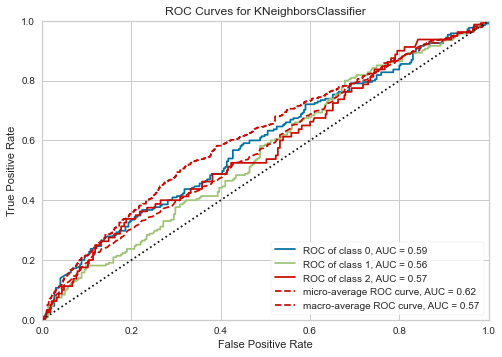



Modelo: mlp

Acurácia média (desvio): 0.444711 +- (0.017946)
F1-score média (desvio): 0.357069 +- (0.021026)
AUC média (desvio): 0.551938 +- (0.016916)

Matriz de Confusão:  
[[[124.6  53.5  15.3]
  [104.4  73.   15.7]
  [ 39.8  25.9   6.3]]]



A curva ROC com do modelo de maior AUC é: 



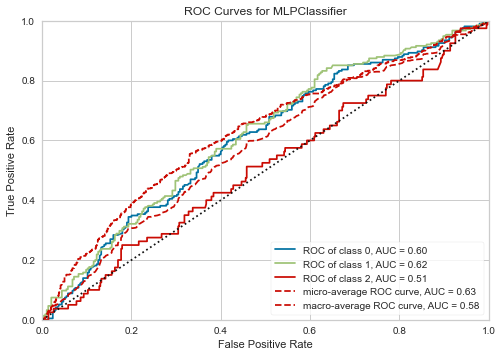



Modelo: dt

Acurácia média (desvio): 0.453426 +- (0.018153)
F1-score média (desvio): 0.328033 +- (0.011030)
AUC média (desvio): 0.531094 +- (0.019550)

Matriz de Confusão:  
[[[121.8  69.7   1.9]
  [105.3  85.8   2. ]
  [ 39.3  32.4   0.3]]]



A curva ROC com do modelo de maior AUC é: 



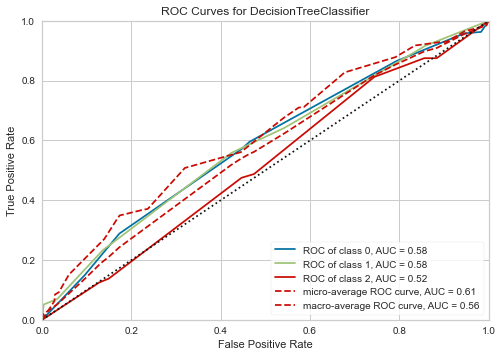



Modelo: svm

Acurácia média (desvio): 0.432489 +- (0.010335)
F1-score média (desvio): 0.354446 +- (0.012929)
AUC média (desvio): 0.541353 +- (0.015591)

Matriz de Confusão:  
[[[119.9  56.7  16.8]
  [103.7  70.8  18.6]
  [ 38.5  25.9   7.6]]]



A curva ROC com do modelo de maior AUC é: 



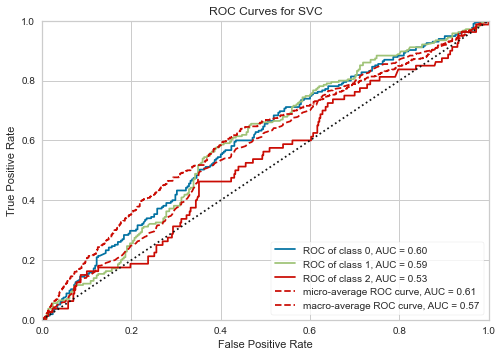



Modelo: gnb

Acurácia média (desvio): 0.425516 +- (0.003802)
F1-score média (desvio): 0.206124 +- (0.007038)
AUC média (desvio): 0.553754 +- (0.016213)

Matriz de Confusão:  
[[[192.7   0.7   0. ]
  [190.7   2.4   0. ]
  [ 71.8   0.2   0. ]]]



A curva ROC com do modelo de maior AUC é: 



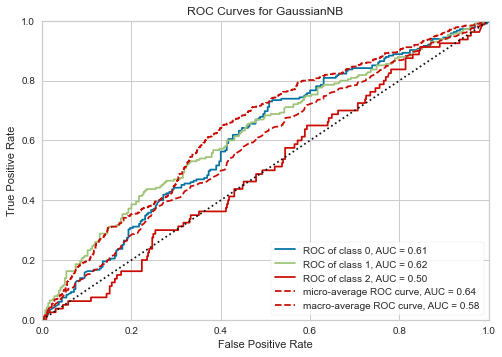



Modelo: bnb

Acurácia média (desvio): 0.430310 +- (0.020310)
F1-score média (desvio): 0.356565 +- (0.017146)
AUC média (desvio): 0.534976 +- (0.020234)

Matriz de Confusão:  
[[[119.   54.5  19.9]
  [100.4  70.1  22.6]
  [ 38.5  25.3   8.2]]]



A curva ROC com do modelo de maior AUC é: 



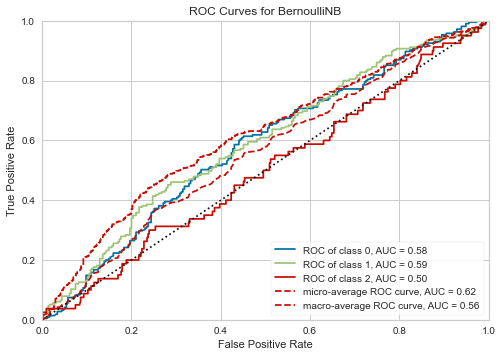

Wall time: 54.7 s


In [72]:
%%time
evaluate_model_with_skfold_4(skf)

## Treino feito com PCA + ENN

In [73]:
# função de avaliação dos modelos PCA + ENN
def evaluate_model_with_skfold_5(skf):
    
    i = 1

    # Listas com os resultados
    knn_r, mlp_r, dt_r, svm_r, gnb_r, bnb_r = [] , [], [], [], [], []
    accuracies, f1_s, auc_s, result_matrix = [], [], [], []

    #dicionário com todas listas
    general_results = {
    'knn': knn_r,
    'mlp': mlp_r,
    'dt': dt_r,
    'svm': svm_r,
    'gnb': gnb_r,
    'bnb': bnb_r
    }

    knn_mx, mlp_mx, dt_mx, svm_mx, gnb_mx, bnb_mx = 0, 0, 0, 0, 0, 0
    print('Aguarde, treinando os modelos: ')
    for train, test in skf.split(X1, y1):
        X_train, X_test = onehotencoding((X1.iloc[train]), X1.iloc[test])
        # X_train, X_test = (X1.iloc[train], X1.iloc[test])
        y_train, y_test = (y1.iloc[train], y1.iloc[test])

        # Para o PCA
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Para o ENN
        undersample = EditedNearestNeighbours(n_neighbors=5, sampling_strategy="auto", kind_sel="mode", n_jobs=-1)
        X_enn, y_enn = undersample.fit_resample(X_train_pca, y_train)

        print(f'{i}º Fold', end=': ')

        #for the kNN
        # dict_knn = grids(knn_params, KNeighborsClassifier(),X_train, y_train)
        knn = KNeighborsClassifier(n_neighbors=37, weights='distance', 
                                    metric = 'manhattan')
        result = major_results(knn, X_enn, y_enn, X_test_pca, y_test)
        knn_r.append(result)

        if np.array(result['auc_list']).max() >= knn_mx:
            knn_mx = np.array(result['auc_list']).max()
            knn_to_be_ploted = [knn, X_enn, y_enn, X_test_pca, y_test]
        
        print('kNN', end=' - ')

        # #for the MLP

        # # dict_mlp = grids(mlp_params, MLPClassifier(), X_train, y_train)
        mlpc = MLPClassifier(activation='logistic', 
                                                                 alpha=0.0001,
                                                                 hidden_layer_sizes=(100, 100),
                                                                 max_iter=20,
                                                                 solver='adam')
        
        result = major_results(mlpc, X_enn, y_enn, X_test_pca, y_test)
        mlp_r.append(result)

        if np.array(result['auc_list']).max() >= mlp_mx:
            mlp_mx = np.array(result['auc_list']).max()
            mlp_to_be_ploted = [mlpc, X_enn, y_enn, X_test_pca, y_test]
            
        print('MLP', end=' - ')
        
        # #for the DT

        # # dict_dt = grids(dt_params, DecisionTreeClassifier(), X_train, y_train)
        dtm = DecisionTreeClassifier(criterion='gini', max_depth=5)
        result = major_results(dtm, X_enn, y_enn, X_test_pca, y_test)
        dt_r.append(result)

        if np.array(result['auc_list']).max() >= dt_mx:
            dt_mx = np.array(result['auc_list']).max()
            dt_to_be_ploted = [dtm, X_enn, y_enn, X_test_pca, y_test]
            
        print('DT', end=' - ')
        
        # #for the SVM

        # # dict_svm = grids(svm_params, SVC(), X_train, y_train)
        svmm = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)
        result = major_results(svmm, X_enn, y_enn, X_test_pca, y_test)
        svm_r.append(result)

        if np.array(result['auc_list']).max() >= svm_mx:
            svm_mx = np.array(result['auc_list']).max()
            svm_to_be_ploted = [svmm, X_enn, y_enn, X_test_pca, y_test]
        
        print('SVM', end=' - ')
            
        # #for the Gaussian NB

        # # dict_gnb = grids(gnb_params, GaussianNB(), X_train, y_train)
        gnb = GaussianNB(var_smoothing=1.0)
        result = major_results(gnb, X_enn, y_enn, X_test_pca, y_test)
        gnb_r.append(result)

        if np.array(result['auc_list']).max() >= gnb_mx:
            gnb_mx = np.array(result['auc_list']).max()
            gnb_to_be_ploted = [gnb, X_enn, y_enn, X_test_pca, y_test]
        
        print('GNB', end=' - ')
            
        # #for the Bernoulli NB

        # # dict_bnb = grids(bnb_params, BernoulliNB(), X_train, y_train)
        bnb = BernoulliNB(alpha=1)
        result = major_results(bnb, X_enn, y_enn, X_test_pca, y_test)
        bnb_r.append(result)

        if np.array(result['auc_list']).max() >= bnb_mx:
            bnb_mx = np.array(result['auc_list']).max()
            bnb_to_be_ploted = [bnb, X_enn, y_enn, X_test_pca, y_test]
        
        print('BNB')
        i += 1

    # Adicionando itens a serem plotados nas listas
    knn_r.append(knn_to_be_ploted)
    mlp_r.append(mlp_to_be_ploted)
    dt_r.append(dt_to_be_ploted)
    svm_r.append(svm_to_be_ploted)
    gnb_r.append(gnb_to_be_ploted)
    bnb_r.append(bnb_to_be_ploted)
    
    # atribuindo listas aos dicionários
    general_results['knn'] = knn_r
    general_results['mlp'] = mlp_r
    general_results['dt'] = dt_r
    general_results['svm'] = svm_r
    general_results['gnb'] = gnb_r
    general_results['bnb'] = bnb_r

    print('\n')
    
    # percorrendo o dicionário e adicionando as métricas para calcular média
    for k, v in general_results.items():
        for item in v[:-2]:
          accuracies.append(item['accuracy'])
          f1_s.append(item['f1'])
          auc_s.append(item['auc_list'])
          result_matrix.append(np.array(item['cm']))


        print('\n')
        # exibição dos resultados
        print(f'Modelo: {k}\n')
        print("Acurácia média (desvio): %.6f +- (%.6f)" %(np.array(accuracies).mean(), np.array(accuracies).std()))
        print("F1-score média (desvio): %.6f +- (%.6f)" %(np.array(f1_s).mean(), np.array(f1_s).std()))
        print("AUC média (desvio): %.6f +- (%.6f)\n" %(np.array(auc_s).mean(), np.array(auc_s).std()))
        print(f"Matriz de Confusão:  \n{sum(result_matrix)*0.1}\n")
        print('\n')
        print('A curva ROC com do modelo de maior AUC é: \n')

        plot_ROC_curve(v[-1][0], v[-1][1], v[-1][2], v[-1][3], v[-1][4])
        
        accuracies, f1_s, auc_s, result_matrix = [], [], [], []

Aguarde, treinando os modelos: 
1º Fold: kNN - MLP - DT - SVM - GNB - BNB
2º Fold: kNN - MLP - DT - SVM - GNB - BNB
3º Fold: kNN - MLP - DT - SVM - GNB - BNB
4º Fold: kNN - MLP - DT - SVM - GNB - BNB
5º Fold: kNN - MLP - DT - SVM - GNB - BNB
6º Fold: kNN - MLP - DT - SVM - GNB - BNB
7º Fold: kNN - MLP - DT - SVM - GNB - BNB
8º Fold: kNN - MLP - DT - SVM - GNB - BNB
9º Fold: kNN - MLP - DT - SVM - GNB - BNB
10º Fold: kNN - MLP - DT - SVM - GNB - BNB




Modelo: knn

Acurácia média (desvio): 0.463896 +- (0.018964)
F1-score média (desvio): 0.370076 +- (0.013405)
AUC média (desvio): 0.582238 +- (0.018644)

Matriz de Confusão:  
[[[124.6  58.1  10.7]
  [ 91.7  82.9  18.5]
  [ 38.9  27.9   5.2]]]



A curva ROC com do modelo de maior AUC é: 



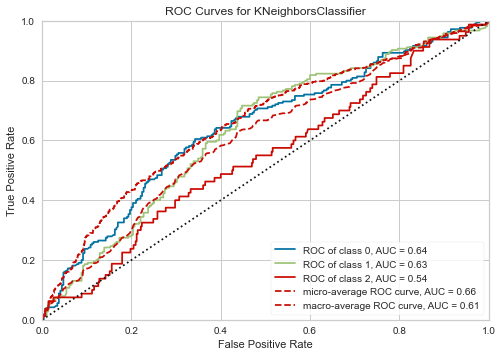



Modelo: mlp

Acurácia média (desvio): 0.474803 +- (0.014849)
F1-score média (desvio): 0.346719 +- (0.013933)
AUC média (desvio): 0.568615 +- (0.011981)

Matriz de Confusão:  
[[[123.8  68.1   1.5]
  [ 99.1  93.3   0.7]
  [ 37.7  33.7   0.6]]]



A curva ROC com do modelo de maior AUC é: 



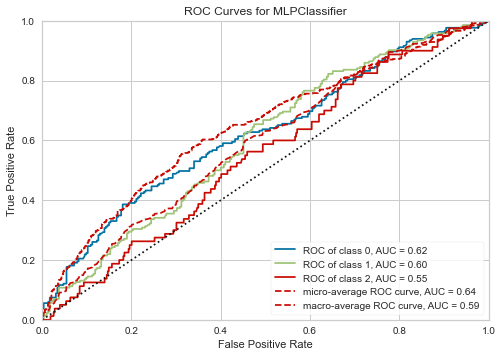



Modelo: dt

Acurácia média (desvio): 0.444701 +- (0.018888)
F1-score média (desvio): 0.351766 +- (0.013804)
AUC média (desvio): 0.548764 +- (0.010869)

Matriz de Confusão:  
[[[112.2  69.4  11.8]
  [ 93.4  87.3  12.4]
  [ 37.9  29.7   4.4]]]



A curva ROC com do modelo de maior AUC é: 



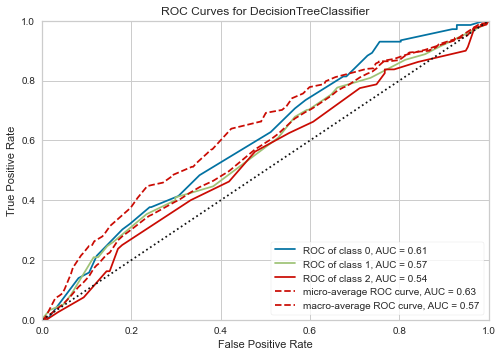



Modelo: svm

Acurácia média (desvio): 0.481563 +- (0.017332)
F1-score média (desvio): 0.347480 +- (0.013139)
AUC média (desvio): 0.564479 +- (0.018324)

Matriz de Confusão:  
[[[110.4  83.    0. ]
  [ 82.5 110.4   0.2]
  [ 33.4  38.6   0. ]]]



A curva ROC com do modelo de maior AUC é: 



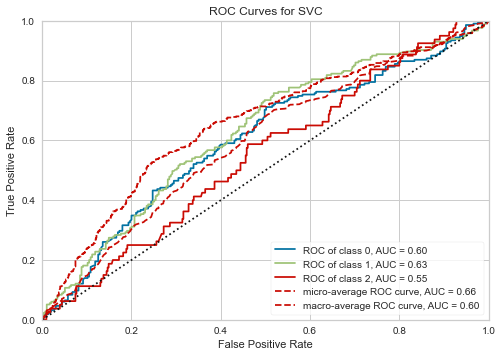



Modelo: gnb

Acurácia média (desvio): 0.423116 +- (0.009240)
F1-score média (desvio): 0.221167 +- (0.011032)
AUC média (desvio): 0.562430 +- (0.017398)

Matriz de Confusão:  
[[[185.7   7.7   0. ]
  [184.8   8.3   0. ]
  [ 68.6   3.4   0. ]]]



A curva ROC com do modelo de maior AUC é: 



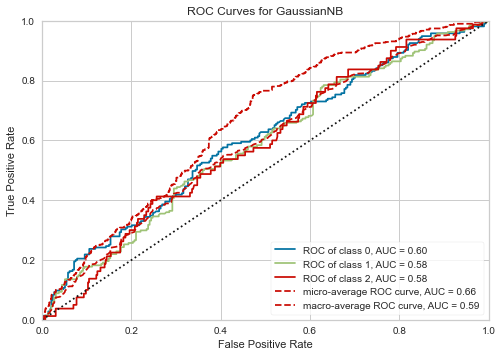



Modelo: bnb

Acurácia média (desvio): 0.433353 +- (0.022191)
F1-score média (desvio): 0.352219 +- (0.015900)
AUC média (desvio): 0.545346 +- (0.016691)

Matriz de Confusão:  
[[[114.4  65.9  13.1]
  [ 97.5  78.1  17.5]
  [ 36.   29.8   6.2]]]



A curva ROC com do modelo de maior AUC é: 



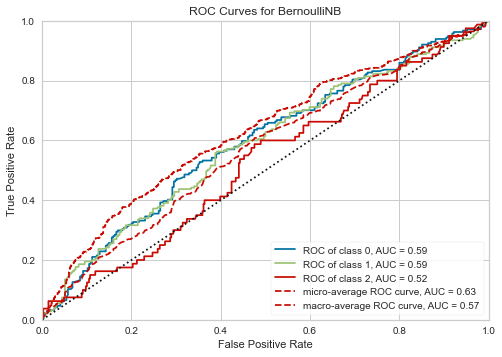

Wall time: 54.9 s


In [74]:
%%time
evaluate_model_with_skfold_5(skf)